In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
#Loading data
df=pd.read_csv('Advertising.csv')

#Viewing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Cleaning data
df=df.drop(columns=['Unnamed: 0'])


In [5]:
df.columns=["TV","Radio","Newspaper","Sales"]


In [6]:
#Data transformation
df["TV"]=df["TV"].astype("int")
df["Radio"]=df["Radio"].astype("int")
df["Newspaper"]=df["Newspaper"].astype("int")
df["Sales"]=df["Sales"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int32
 1   Radio      200 non-null    int32
 2   Newspaper  200 non-null    int32
 3   Sales      200 non-null    int32
dtypes: int32(4)
memory usage: 3.2 KB


In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12


In [8]:
#Minimum sales
x=df['Sales'].idxmin()
print("Minimum sales are present when advertising is:")
df.loc[x]

Minimum sales are present when advertising is:


TV            0
Radio        39
Newspaper     8
Sales         1
Name: 130, dtype: int32

In [9]:
#Maximum sales
x=df['Sales'].idxmax()
print("Maximum sales are present when advertising is:")
df.loc[x]

Maximum sales are present when advertising is:


TV           276
Radio         48
Newspaper     41
Sales         27
Name: 175, dtype: int32

In [10]:
#Statistical data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.00000,200.000000,200.000000
mean,146.570000,22.79000,30.100000,13.540000
std,85.824731,14.82582,21.769233,5.253226
min,0.000000,0.00000,0.000000,1.000000
25%,73.750000,9.75000,12.000000,10.000000
50%,149.000000,22.50000,25.000000,12.000000
75%,218.250000,36.00000,45.000000,17.000000
max,296.000000,49.00000,114.000000,27.000000


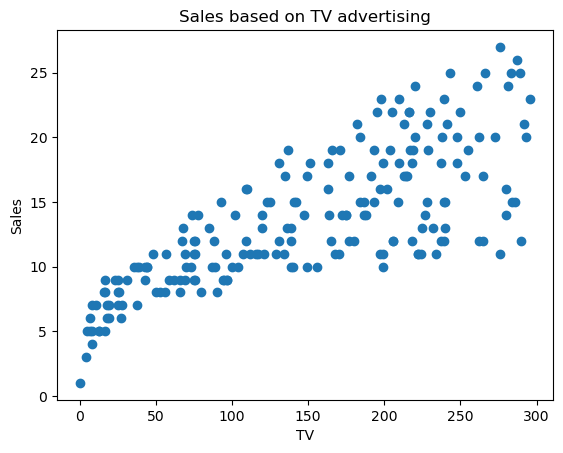

In [11]:
#Data visualization
#TV Advertising
plt.scatter(df["TV"],df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales based on TV advertising")
plt.show()

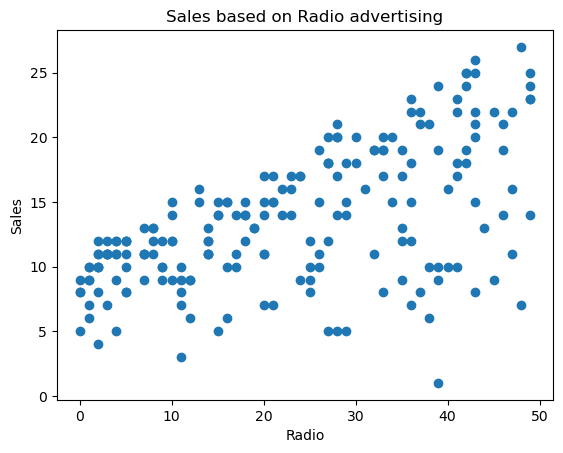

In [12]:
#Radio Advertising
plt.scatter(df["Radio"],df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales based on Radio advertising")
plt.show()

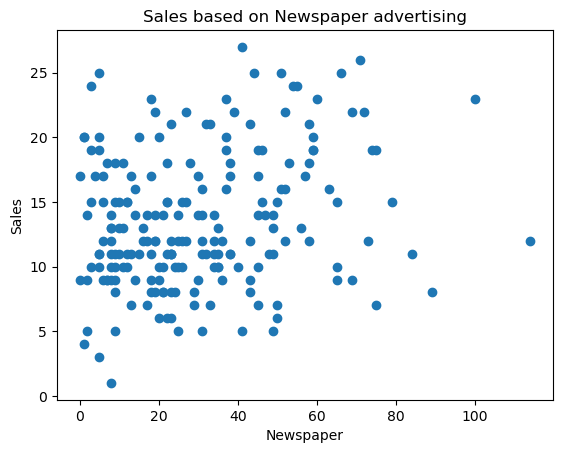

In [13]:
#Newspaper Advertising
plt.scatter(df["Newspaper"],df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales based on Newspaper advertising")
plt.show()

In [14]:
#Building machine learning model

x = df.drop(['Sales'], axis=1)
y = df[["Sales"]]

#Splitting into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#Regression model
models = [('LinearRegression', LinearRegression())]

In [15]:
#Model summary
lin_model = ols(formula="Sales ~ TV + Radio - Newspaper ",data=df).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.478856
TV           0.045797
Radio        0.190813
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     834.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.39e-97
Time:                        16:23:57   Log-Likelihood:                -390.19
No. Observations:                 200   AIC:                             786.4
Df Residuals:                     197   BIC:                             796.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------